# Домашнее задание, часть 1

## Компьютерный практикум, 2020-2021

Правила выполнения работы:

- Решение каждой задачи должно располагаться в **ячейках типа "Код" под ячейкой с условием задачи**
- **Результат** каждой задачи должен быть **выведен на экран**
- **Запрещено** изменять ячейки с условиями задач каким-либо образом и перемещать их

Полезные документы:

- [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [Scientific Python Lectures / Numpy](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

**[1]. В ограниченной круговой задаче трех тел для системы Солнце-Земля рассчитать положение [точек Лагранжа](https://ru.wikipedia.org/wiki/Точки_Лагранжа) L1, L2, L3 численно с погрешностью 1e-12.**

Точки $L_1, L_2, L_3$ расположены на оси $X$ и являются точками неустойчивого равновесия.

Для расчета необходимо найти корни нелинейного уравнения:

$\ddot x-2\dot y -x=-[\frac{(1 - \mu)(x + \mu)}{r_1^3}+\frac{\mu (x-(1 - \mu)}{r_2^3}]$, где

$\ddot x = 0, \dot y = 0, y = 0$

$ r_1 = \sqrt{(x + \mu)^2 + y^2} $

$ r_2 = \sqrt{((x - (1-\mu))^2 + y^2} $

$ \mu = 3.001348389698916e-06 $

В качестве начальных приближений рекомендуется использовать:

для $L_1$ : $1 - (\frac{\mu}{3})^\frac{1}{3}$,
для $L_2$ : $1 + (\frac{\mu}{3})^\frac{1}{3}$,
для $L_3$ : $-(1 + \frac{5\mu}{12})$.


Полезные функции: `scipy.optimize.root_scalar`

In [59]:
import numpy as np
import scipy.optimize as scopt
import scipy.integrate as scint
import matplotlib.pyplot as plt


def ans(x):
  answer =  x - (1 - m) * (x + m) / ((np.sqrt((x + m) ** 2)) ** 3) - (m * (x - (1 - m))) / ((np.sqrt((x - (1 - m)) ** 2)) ** 3)
  return answer

y = 0 
m = 3.001348389698916 * 1e-6
L10 = 1 - (m / 3) ** (1 / 3)
L20 = 1 + (m / 3) ** (1 / 3)
L30 = -(1 + (5 * m / 12))
L1 = scopt.root_scalar(ans, x0 = L10, x1 = 0, xtol = 1e-12).root
L2 = scopt.root_scalar(ans, x0 = L20, x1 = 0, xtol = 1e-12).root
L3 = scopt.root_scalar(ans, x0 = L30, x1 = 0, xtol = 1e-12).root
print("L1: ",L1, "L2: ",L2, "L3: ",L3)

L1:  0.9899985020136358 L2:  1.0100014979863738 L3:  -1.000001250561829


**[2]. Построить контурную карту гравитационного потенциала $\Omega(x, y)$:**
    
a) в общей окрестности точек $L_1$ и $L_2$

б) в окрестности точки $L_3$
       
$ \Omega(x,y) = \frac{x^2 + y^2}{2} + \frac{1 - \mu}{r_1} + \frac{\mu}{r_2} $

$ r_1 = \sqrt{(x + \mu)^2 + y^2} $

$ r_2 = \sqrt{((x - (1-\mu))^2 + y^2} $

$ \mu = 3.001348389698916e-06 $

Результат должен быть качественно схож с изображением [на странице](https://ru.wikipedia.org/wiki/Точки_Лагранжа).

Для построения линий уровня рекомендуется использовать значения, близкие к значению функции $\Omega$ в точках Лагранжа. 

Полезные функции: `np.linspace`, `np.meshgrid`, `plt.contour`, `plt.colorbar`, `plt.xlabel`, `plt.ylabel`

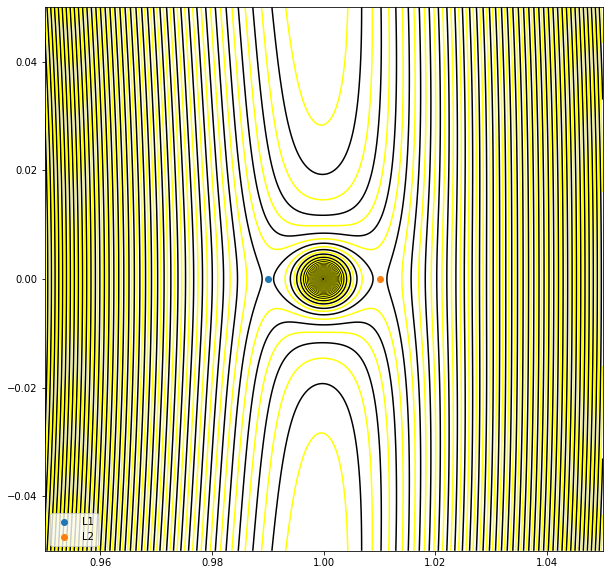

In [60]:
def r1(x,y):
  R1 = np.sqrt((x + m) ** 2 + y ** 2)
  return R1
  
def r2(x,y):
  R2 = np.sqrt((x - (1 - m)) ** 2 + y ** 2)
  return R2

m = 3.001348389698916 * 1e-6 
X = np.linspace((L1 + L2)/2 - 0.05, (L1 + L2) / 2 + 0.05, 500)
Y = np.linspace(-0.05, 0.05, 500)
x, y = np.meshgrid(X, Y)
u = (x ** 2 + y ** 2) / 2 + (1 - m) / r1(x,y) + m / r2(x,y)
fig, ax = plt.subplots()
ax.contour(x, y, u, 500, colors=['black','yellow'])
ax.scatter(L1, 0)
ax.scatter(L2, 0)
plt.legend(labels = ["L1", "L2"], loc = 'lower left')
fig.set_figwidth(10)
fig.set_figheight(10)
plt.show()

L3


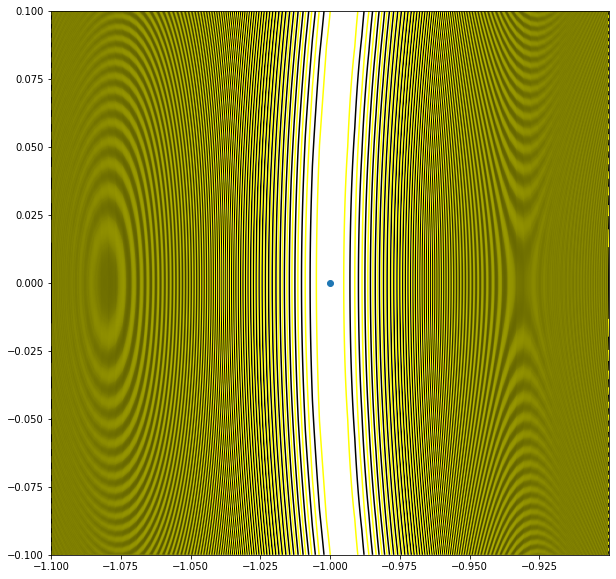

In [61]:
X = np.linspace(L3 - 0.1, L3 + 0.1, 80)
Y = np.linspace(-0.1, 0.1, 80)
x, y = np.meshgrid(X, Y)
u = (x ** 2 + y ** 2) / 2 + (1 - m) / r1(x,y) + m / r2(x,y)
fig, ax = plt.subplots()
ax.contour(x, y, u, 500, colors=['black','yellow'])
fig.set_figwidth(10)
fig.set_figheight(10)
ax.scatter(L3, 0)
plt.show
print("L3")

**3. Построить график зависимости периода орбит Ляпунова вокруг точки $L_1$ от начального положения на оси $X$**

Уравнения движения:

$\ddot x-2\dot y -x=-[\frac{(1 - \mu)(x + \mu)}{r_1^3}+\frac{\mu (x-(1 - \mu)}{r_2^3}]$

$\ddot y +\dot x-y=-[\frac{1 - \mu}{r_1^3}+\frac{\mu}{r_2^3}]y$

$ r_1 = \sqrt{(x + \mu)^2 + y^2} $

$ r_2 = \sqrt{((x - (1-\mu))^2 + y^2} $

$ \mu = 3.001348389698916e-06 $

Для орбит Ляпунова необходимо взять начальный вектор состояния:

$(x_0, y_0, \dot x_0, \dot y_0) = (x_0, 0, 0, \dot y_0)$, где
- $ x_0 \in (L_1, 1 - \mu) $, 
- $\dot y_0$ необходимо рассчитать из следующего условия:

    $ \dot x(t^*) = 0$, где $t^* > 0$ - момент следующего пересечения оси $X$ траекторией движения при начальном векторе состояния $(x_0, 0, 0, \dot y_0)$.

Рекомендуется начинать расчет орбит Ляпунова от точки $L_1$, а для расчета следующей орбиты брать начальную скорость предыдущей рассчитанной орбиты.

Полезные функции: `scipy.integrate.solve_ivp`, `scipy.optimize.root_scalar`, `plt.plot`, `plt.xlabel`, `plt.ylabel`

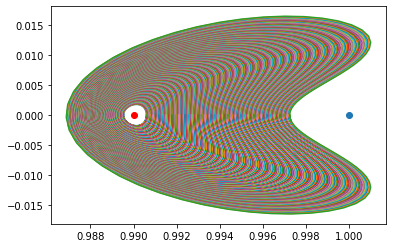

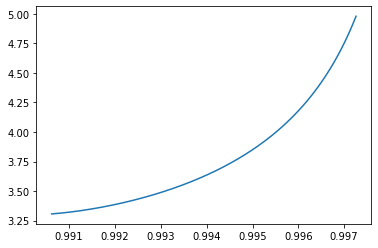

In [64]:
import scipy.integrate

def sol(t, s):
  ds = np.empty_like(s)
  x, y, x1, y1 = s
  ds[0] = x1
  ds[1] = y1
  ds[2] = 2 * y1 + x - (1 - m) * (x + m) / ((np.sqrt((x + m) ** 2 + y ** 2)) ** 3) - (m * (x - (1 - m))) / ((np.sqrt((x - (1 - m)) ** 2 + y ** 2)) ** 3)
  ds[3] = -x1 + y - (1 - m) * y / ((np.sqrt((x + m) ** 2 + y ** 2)) ** 3) - (m * y) / ((np.sqrt((x - (1 - m)) ** 2 + y ** 2)) ** 3)
  return ds

dy = -0.003497463231679292
x = L1 + 0.0006
vec = np.array([x, 0, 0, dy])
res = scipy.integrate.solve_ivp(sol, [0, 10], vec,  method = 'DOP853',  max_step = 0.1, rtol = 1e-12, atol = 1e-12)
def flag(t,s):
  if t < 0.1:
     return -1
  return s[1]

def func(dy):
  vec = np.array([L1+ eps, 0, 0, dy])
  res = scipy.integrate.solve_ivp(sol, [0, t/2], vec,  method='DOP853',  max_step=0.1, rtol=1e-12, atol=1e-12, events = flag)
  return res.y_events[0][0,2]


eps = 0.0006
dy = np.array([dy, 0]) 
t = 5 
count = 0
xs = []
ys = []
fig, ax = plt.subplots()
ax.scatter(L1, 0, c = 'red')
ax.scatter(1 - m, 0)
while L1 + eps < 1 - m:
  k = dy[0]
  dy[0] = scipy.optimize.root_scalar(func, x0=dy[0], x1=dy[1], xtol=1e-12).root
  dy[1] = k
  vec = np.array([L1 + eps, 0, 0, dy[0]])
  orb = scipy.integrate.solve_ivp(sol, [0, t], vec,  method='DOP853',  max_step = 0.1, rtol = 1e-12, atol = 1e-12, events = flag)
  eps += 0.00002
  if count > 1:
    if 2 * orb.t_events[0][0] < ys[count - 1]:
      break
  xs.append(L1 + eps)
  ys.append(2 * orb.t_events[0][0])
  ax.plot(orb.y[0],orb.y[1])
  count = count + 1

plt.show()
fig1, ax1 = plt.subplots()
ax1.plot(xs, ys)
plt.show()